In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# M4 chatGPT - 20 Features

In [3]:
import pandas as pd
import numpy as np
df = pd.read_csv("/content/drive/MyDrive/features_chatgpt_normalized.csv")
df.head()

,source,source_ID,model,prompt,human_text,machine_text,no_sentence_human,no_sentence_machine,num_words_human,num_words_machine,...,check_word2_3_machine,check_word3_machine,check_word4_machine,check_word5_machine,check_num_human,check_num_machine,check_capitals_human,check_capitals_machine,check_et_human,check_et_machine
0,arxiv,704.0007,gpt-3.5-turbo,Generate a 150-220-word abstract for work with...,A rather non-standard quantum representation...,"In this paper, we investigate the continuum li...",0.315789,0.6,0.153488,0.286550,...,1,1,1,1,0,0,0,0,1,1
1,arxiv,704.0009,gpt-3.5-turbo,Generate a 150-220-word abstract for work with...,We discuss the results from the combined IRA...,"In this paper, we present the results of our a...",0.526316,0.6,0.734884,0.461988,...,1,1,1,1,1,1,1,1,1,1
2,arxiv,704.0017,gpt-3.5-turbo,Generate a 150-220-word abstract for work with...,Results from spectroscopic observations of t...,"In this work, we present the results of high-r...",0.526316,0.2,0.525581,0.128655,...,1,1,1,1,1,1,1,1,1,1
3,arxiv,704.0022,gpt-3.5-turbo,Generate a 150-220-word abstract for work with...,We present Lie group integrators for nonline...,"In this work, we present a new method of integ...",0.421053,0.4,0.409302,0.438596,...,1,1,1,1,0,0,1,1,1,1
4,arxiv,704.0023,gpt-3.5-turbo,Generate a 150-220-word abstract for work with...,"The very nature of the solar chromosphere, i...","In this study, we present the use of Atacama L...",0.263158,0.6,0.432558,0.450292,...,1,1,1,1,1,1,1,1,1,1


In [4]:
human = ['no_sentence_human', 'num_words_human', 'character0_human', 'character1_human', 'character2_3_human', 'character4_human', 'character5_human', 'std_dev_human', 'sent_len_diff_human', 'count_short_sentences_in_paragraphs_human', 'count_long_sentences_in_paragraphs_human', 'check_word0_human', 'check_word1_human', 'check_word2_3_human', 'check_word3_human', 'check_word4_human', 'check_word5_human', 'check_num_human', 'check_capitals_human', 'check_et_human']
machine = ['no_sentence_machine', 'num_words_machine', 'character0_machine', 'character1_machine', 'character2_3_machine', 'character4_machine', 'character5_machine', 'std_dev_machine', 'sent_len_diff_machine', 'count_short_sentences_in_paragraphs_machine', 'count_long_sentences_in_paragraphs_machine', 'check_word0_machine', 'check_word1_machine', 'check_word2_3_machine', 'check_word3_machine', 'check_word4_machine', 'check_word5_machine', 'check_num_machine', 'check_capitals_machine', 'check_et_machine']

df_human = df.loc[:, human]
df_human['class'] = 0
df_machine = df.loc[:, machine]
df_machine['class'] = 1

human = {'no_sentence_human': 'no_sentence', 'num_words_human': 'num_words', 'character0_human': 'character0', 'character1_human': 'character1', 'character2_3_human': 'character2_3', 'character4_human': 'character4', 'character5_human': 'character5', 'std_dev_human': 'std_dev', 'sent_len_diff_human': 'sent_len_diff', 'count_short_sentences_in_paragraphs_human': 'count_short_sentences_in_paragraphs', 'count_long_sentences_in_paragraphs_human': 'count_long_sentences_in_paragraphs', 'check_word0_human': 'check_word0', 'check_word1_human': 'check_word1', 'check_word2_3_human': 'check_word2_3', 'check_word3_human': 'check_word3', 'check_word4_human': 'check_word4', 'check_word5_human': 'check_word5', 'check_num_human': 'check_num', 'check_capitals_human': 'check_capitals', 'check_et_human': 'check_et'}
machine = {'no_sentence_machine': 'no_sentence', 'num_words_machine': 'num_words', 'character0_machine': 'character0', 'character1_machine': 'character1', 'character2_3_machine': 'character2_3', 'character4_machine': 'character4', 'character5_machine': 'character5', 'std_dev_machine': 'std_dev', 'sent_len_diff_machine': 'sent_len_diff', 'count_short_sentences_in_paragraphs_machine': 'count_short_sentences_in_paragraphs', 'count_long_sentences_in_paragraphs_machine': 'count_long_sentences_in_paragraphs', 'check_word0_machine': 'check_word0', 'check_word1_machine': 'check_word1', 'check_word2_3_machine': 'check_word2_3', 'check_word3_machine': 'check_word3', 'check_word4_machine': 'check_word4', 'check_word5_machine': 'check_word5', 'check_num_machine': 'check_num', 'check_capitals_machine': 'check_capitals', 'check_et_machine': 'check_et'}

df_human = df_human.rename(columns=human)
df_machine = df_machine.rename(columns=machine)

In [5]:
df_human.head()

,no_sentence,num_words,character0,character1,character2_3,character4,character5,std_dev,sent_len_diff,count_short_sentences_in_paragraphs,...,check_word0,check_word1,check_word2_3,check_word3,check_word4,check_word5,check_num,check_capitals,check_et,class
0,0.315789,0.153488,0,1,0,0,0,0.100546,0.089494,1,...,1,1,1,1,1,1,0,0,1,0
1,0.526316,0.734884,0,1,0,0,1,0.075265,0.062257,0,...,1,1,1,1,1,1,1,1,1,0
2,0.526316,0.525581,1,1,0,0,0,0.143453,0.190661,1,...,1,1,1,1,1,1,1,1,1,0
3,0.421053,0.409302,0,1,0,0,0,0.100065,0.101167,0,...,1,1,1,1,1,1,0,1,1,0
4,0.263158,0.432558,1,1,0,0,0,0.124362,0.108949,0,...,1,1,1,1,1,1,1,1,1,0


In [6]:
df_machine.head()

,no_sentence,num_words,character0,character1,character2_3,character4,character5,std_dev,sent_len_diff,count_short_sentences_in_paragraphs,...,check_word0,check_word1,check_word2_3,check_word3,check_word4,check_word5,check_num,check_capitals,check_et,class
0,0.6,0.286550,0,1,0,0,0,0.241890,0.200000,0,...,1,1,1,1,1,1,0,0,1,1
1,0.6,0.461988,1,1,0,0,0,0.366513,0.169231,0,...,1,1,1,1,1,1,1,1,1,1
2,0.2,0.128655,1,1,0,0,0,0.073460,0.123077,0,...,1,1,1,1,1,1,1,1,1,1
3,0.4,0.438596,0,1,0,0,0,0.366371,0.169231,0,...,1,1,1,1,1,1,0,1,1,1
4,0.6,0.450292,1,1,0,0,1,0.328033,0.169231,0,...,1,1,1,1,1,1,1,1,1,1


In [7]:
full_df = pd.concat([df_human, df_machine], ignore_index=True)
full_df.head()

,no_sentence,num_words,character0,character1,character2_3,character4,character5,std_dev,sent_len_diff,count_short_sentences_in_paragraphs,...,check_word0,check_word1,check_word2_3,check_word3,check_word4,check_word5,check_num,check_capitals,check_et,class
0,0.315789,0.153488,0,1,0,0,0,0.100546,0.089494,1,...,1,1,1,1,1,1,0,0,1,0
1,0.526316,0.734884,0,1,0,0,1,0.075265,0.062257,0,...,1,1,1,1,1,1,1,1,1,0
2,0.526316,0.525581,1,1,0,0,0,0.143453,0.190661,1,...,1,1,1,1,1,1,1,1,1,0
3,0.421053,0.409302,0,1,0,0,0,0.100065,0.101167,0,...,1,1,1,1,1,1,0,1,1,0
4,0.263158,0.432558,1,1,0,0,0,0.124362,0.108949,0,...,1,1,1,1,1,1,1,1,1,0


In [8]:
X = full_df.iloc[:,:-1]
y = full_df.iloc[:,-1]

# XGBoost classifier trained and tested on M4 chatGPT

In [9]:
from sklearn.model_selection import train_test_split
X_train_full, X_test, y_train_full, y_test=train_test_split(X,y,shuffle=True, test_size=0.2, random_state=420)

In [10]:
X_train, X_val, y_train, y_val=train_test_split(X_train_full, y_train_full, test_size=0.2, shuffle=True, random_state=42)

test_XG = []
train_XG = []
learning_rate_range = np.arange(0.01, 1, 0.05)
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(40, 30))
idx = 1

<Figure size 4000x3000 with 0 Axes>

In [11]:
from xgboost import XGBClassifier
xgb_clf = XGBClassifier(n_estimators = 500,
                        learning_rate = 0.05,
                        use_label_encoder = False,
                        eval_metric = "logloss",
                        early_stopping_rounds = 5,
                        n_jobs = -1)




Streaming output truncated to the last 5000 lines.
[12]	validation_0-logloss:0.07502
[13]	validation_0-logloss:0.06854
[14]	validation_0-logloss:0.06410
[15]	validation_0-logloss:0.05309
[16]	validation_0-logloss:0.04668
[17]	validation_0-logloss:0.04348
[18]	validation_0-logloss:0.03869
[19]	validation_0-logloss:0.03698
[20]	validation_0-logloss:0.03378
[21]	validation_0-logloss:0.02878
[22]	validation_0-logloss:0.02715
[23]	validation_0-logloss:0.02355
[24]	validation_0-logloss:0.02079
[25]	validation_0-logloss:0.01993
[26]	validation_0-logloss:0.01940
[27]	validation_0-logloss:0.01910
[28]	validation_0-logloss:0.01896
[29]	validation_0-logloss:0.01815
[30]	validation_0-logloss:0.01768
[31]	validation_0-logloss:0.01739
[32]	validation_0-logloss:0.01708
[33]	validation_0-logloss:0.01663
[34]	validation_0-logloss:0.01674
[35]	validation_0-logloss:0.01648
[36]	validation_0-logloss:0.01619
[37]	validation_0-logloss:0.01589
[38]	validation_0-logloss:0.01568
[39]	validation_0-logloss:0.015

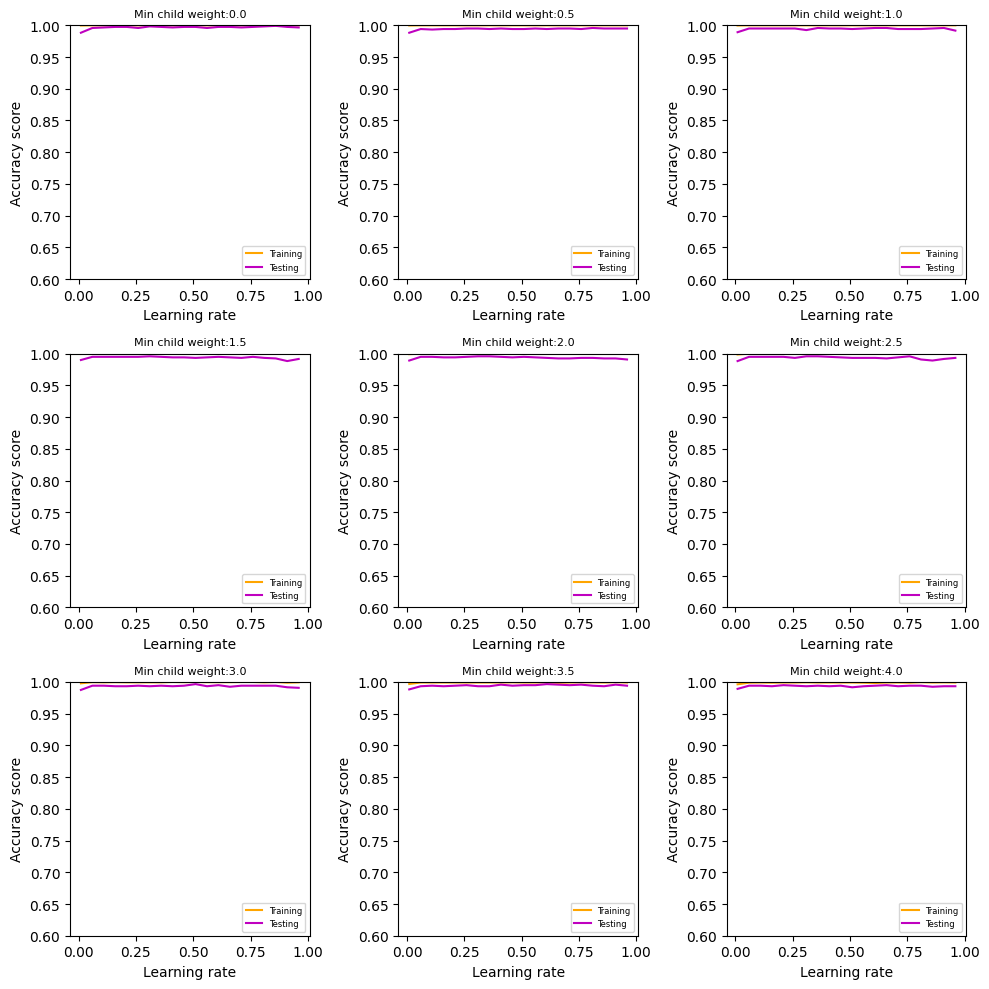

In [12]:
fig, axs = plt.subplots(3, 3, figsize=(10, 10))
idx = 0

for weight in np.arange(0, 4.5, 0.5):
    train = []
    test = []
    for lr in learning_rate_range:
        xgb_classifier = XGBClassifier(n_estimators=500,
                                       use_label_encoder=False,
                                       eval_metric="logloss",
                                       early_stopping_rounds=5,
                                       n_jobs=-1,
                                       eta=lr,
                                       reg_lambda=1,
                                       min_child_weight=weight)
        xgb_classifier.fit(X_train, y_train,
                           eval_set=[(X_val, y_val)],
                           verbose=True)
        train.append(xgb_classifier.score(X_train, y_train))
        test.append(xgb_classifier.score(X_test, y_test))

    row_idx = idx // 3
    col_idx = idx % 3
    axs[row_idx, col_idx].plot(learning_rate_range, train, c='orange', label='Training')
    axs[row_idx, col_idx].plot(learning_rate_range, test, c='m', label='Testing')
    axs[row_idx, col_idx].set_xlabel('Learning rate')
    axs[row_idx, col_idx].set_ylabel('Accuracy score')
    axs[row_idx, col_idx].set_ylim(0.6, 1)
    axs[row_idx, col_idx].legend(prop={'size': 6}, loc='lower right')
    title = "Min child weight:" + str(weight)
    axs[row_idx, col_idx].set_title(title, size=8)
    idx += 1

plt.tight_layout()
plt.show()

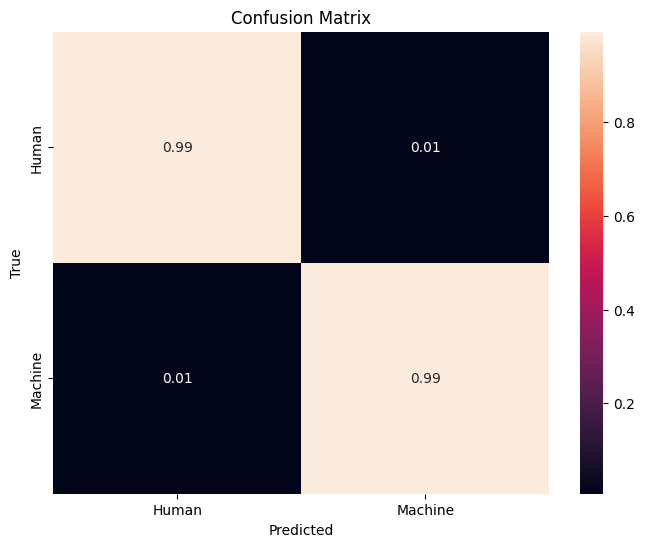

In [13]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

y_pred = xgb_classifier.predict(X_test)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
sns.heatmap(cmn, annot=True, fmt='.2f', xticklabels=['Human', 'Machine'], yticklabels=['Human', 'Machine'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show(block=False)

# M4 Bloomz - 20 Features

In [14]:
df = pd.read_csv("/content/drive/MyDrive/features_bloomz_normalized.csv")
df.head()

,source,source_ID,model,title,human_text,machine_text,no_sentence_human,no_sentence_machine,num_words_human,num_words_machine,...,check_word2_3_machine,check_word3_machine,check_word4_machine,check_word5_machine,check_num_human,check_num_machine,check_capitals_human,check_capitals_machine,check_et_human,check_et_machine
0,arxiv,704.0007,bigscience/bloomz,Polymer Quantum Mechanics and its Continuum Limit,A rather non-standard quantum representation...,The present work is devoted to the study of qu...,0.315789,0.272727,0.153488,0.342561,...,1,1,1,1,0,0,0,0,1,1
1,arxiv,704.0009,bigscience/bloomz,"The Spitzer c2d Survey of Large, Nearby, Inste...",We discuss the results from the combined IRA...,We present the results of our analysis of the ...,0.526316,0.181818,0.734884,0.325260,...,1,1,1,1,1,1,1,1,1,1
2,arxiv,704.0017,bigscience/bloomz,Spectroscopic Observations of the Intermediate...,Results from spectroscopic observations of t...,We report on spectroscopic observations made w...,0.526316,0.318182,0.525581,0.211073,...,1,1,1,1,1,1,1,1,1,1
3,arxiv,704.0022,bigscience/bloomz,Stochastic Lie group integrators,We present Lie group integrators for nonline...,We present new numerical methods for stochasti...,0.421053,0.181818,0.409302,0.273356,...,1,1,1,1,0,0,1,1,1,1
4,arxiv,704.0023,bigscience/bloomz,ALMA as the ideal probe of the solar chromosphere,"The very nature of the solar chromosphere, i...",The Solar Chromosphere is an important compone...,0.263158,0.500000,0.432558,0.532872,...,1,1,1,1,1,0,1,1,1,1


In [15]:
human = ['no_sentence_human', 'num_words_human', 'character0_human', 'character1_human', 'character2_3_human', 'character4_human', 'character5_human', 'std_dev_human', 'sent_len_diff_human', 'count_short_sentences_in_paragraphs_human', 'count_long_sentences_in_paragraphs_human', 'check_word0_human', 'check_word1_human', 'check_word2_3_human', 'check_word3_human', 'check_word4_human', 'check_word5_human', 'check_num_human', 'check_capitals_human', 'check_et_human']
machine = ['no_sentence_machine', 'num_words_machine', 'character0_machine', 'character1_machine', 'character2_3_machine', 'character4_machine', 'character5_machine', 'std_dev_machine', 'sent_len_diff_machine', 'count_short_sentences_in_paragraphs_machine', 'count_long_sentences_in_paragraphs_machine', 'check_word0_machine', 'check_word1_machine', 'check_word2_3_machine', 'check_word3_machine', 'check_word4_machine', 'check_word5_machine', 'check_num_machine', 'check_capitals_machine', 'check_et_machine']

df_human = df.loc[:, human]
df_human['class'] = 0
df_machine = df.loc[:, machine]
df_machine['class'] = 1

human = {'no_sentence_human': 'no_sentence', 'num_words_human': 'num_words', 'character0_human': 'character0', 'character1_human': 'character1', 'character2_3_human': 'character2_3', 'character4_human': 'character4', 'character5_human': 'character5', 'std_dev_human': 'std_dev', 'sent_len_diff_human': 'sent_len_diff', 'count_short_sentences_in_paragraphs_human': 'count_short_sentences_in_paragraphs', 'count_long_sentences_in_paragraphs_human': 'count_long_sentences_in_paragraphs', 'check_word0_human': 'check_word0', 'check_word1_human': 'check_word1', 'check_word2_3_human': 'check_word2_3', 'check_word3_human': 'check_word3', 'check_word4_human': 'check_word4', 'check_word5_human': 'check_word5', 'check_num_human': 'check_num', 'check_capitals_human': 'check_capitals', 'check_et_human': 'check_et'}
machine = {'no_sentence_machine': 'no_sentence', 'num_words_machine': 'num_words', 'character0_machine': 'character0', 'character1_machine': 'character1', 'character2_3_machine': 'character2_3', 'character4_machine': 'character4', 'character5_machine': 'character5', 'std_dev_machine': 'std_dev', 'sent_len_diff_machine': 'sent_len_diff', 'count_short_sentences_in_paragraphs_machine': 'count_short_sentences_in_paragraphs', 'count_long_sentences_in_paragraphs_machine': 'count_long_sentences_in_paragraphs', 'check_word0_machine': 'check_word0', 'check_word1_machine': 'check_word1', 'check_word2_3_machine': 'check_word2_3', 'check_word3_machine': 'check_word3', 'check_word4_machine': 'check_word4', 'check_word5_machine': 'check_word5', 'check_num_machine': 'check_num', 'check_capitals_machine': 'check_capitals', 'check_et_machine': 'check_et'}

df_human = df_human.rename(columns=human)
df_machine = df_machine.rename(columns=machine)

In [16]:
df_human.head()

,no_sentence,num_words,character0,character1,character2_3,character4,character5,std_dev,sent_len_diff,count_short_sentences_in_paragraphs,...,check_word0,check_word1,check_word2_3,check_word3,check_word4,check_word5,check_num,check_capitals,check_et,class
0,0.315789,0.153488,0,1,0,0,0,0.100546,0.089494,1,...,1,1,1,1,1,1,0,0,1,0
1,0.526316,0.734884,0,1,0,0,1,0.075265,0.062257,0,...,1,1,1,1,1,1,1,1,1,0
2,0.526316,0.525581,1,1,0,0,0,0.143453,0.190661,1,...,1,1,1,1,1,1,1,1,1,0
3,0.421053,0.409302,0,1,0,0,0,0.100065,0.101167,0,...,1,1,1,1,1,1,0,1,1,0
4,0.263158,0.432558,1,1,0,0,0,0.124362,0.108949,0,...,1,1,1,1,1,1,1,1,1,0


In [17]:
df_machine.head()

,no_sentence,num_words,character0,character1,character2_3,character4,character5,std_dev,sent_len_diff,count_short_sentences_in_paragraphs,...,check_word0,check_word1,check_word2_3,check_word3,check_word4,check_word5,check_num,check_capitals,check_et,class
0,0.272727,0.342561,1,1,1,0,0,0.082785,0.071970,0,...,1,1,1,1,1,1,0,0,1,1
1,0.181818,0.325260,1,1,1,0,0,0.076646,0.075758,0,...,1,1,1,1,1,1,1,1,1,1
2,0.318182,0.211073,1,1,0,0,0,0.058561,0.068182,1,...,1,1,1,1,1,1,1,1,1,1
3,0.181818,0.273356,1,1,0,0,0,0.181603,0.219697,1,...,1,1,1,1,1,1,0,1,1,1
4,0.500000,0.532872,1,1,0,1,0,0.051337,0.030303,0,...,1,1,1,1,1,1,0,1,1,1


In [18]:
full_df = pd.concat([df_human, df_machine], ignore_index=True)
full_df.head()

,no_sentence,num_words,character0,character1,character2_3,character4,character5,std_dev,sent_len_diff,count_short_sentences_in_paragraphs,...,check_word0,check_word1,check_word2_3,check_word3,check_word4,check_word5,check_num,check_capitals,check_et,class
0,0.315789,0.153488,0,1,0,0,0,0.100546,0.089494,1,...,1,1,1,1,1,1,0,0,1,0
1,0.526316,0.734884,0,1,0,0,1,0.075265,0.062257,0,...,1,1,1,1,1,1,1,1,1,0
2,0.526316,0.525581,1,1,0,0,0,0.143453,0.190661,1,...,1,1,1,1,1,1,1,1,1,0
3,0.421053,0.409302,0,1,0,0,0,0.100065,0.101167,0,...,1,1,1,1,1,1,0,1,1,0
4,0.263158,0.432558,1,1,0,0,0,0.124362,0.108949,0,...,1,1,1,1,1,1,1,1,1,0


# Test on M4 Bloomz

In [19]:
X = full_df.iloc[:,:-1]
y = full_df.iloc[:,-1]

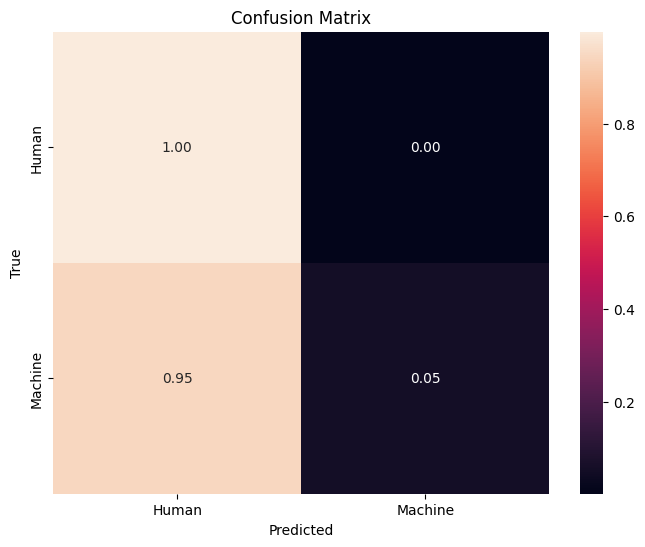

In [20]:
y_pred = xgb_classifier.predict(X)

# Compute confusion matrix
cm = confusion_matrix(y, y_pred)

# Plot confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
sns.heatmap(cmn, annot=True, fmt='.2f', xticklabels=['Human', 'Machine'], yticklabels=['Human', 'Machine'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# M4 paraphrased chatGPT - 20 Features
## lexical = 20, order = 40

In [21]:
import pandas as pd
df = pd.read_csv("/content/drive/MyDrive/features_chatgpt_normalized_paraphrased.csv")
df.head()

,source,source_ID,model,prompt,human_text,machine_text,no_sentence_human,no_sentence_machine,num_words_human,num_words_machine,...,check_word2_3_machine,check_word3_machine,check_word4_machine,check_word5_machine,check_num_human,check_num_machine,check_capitals_human,check_capitals_machine,check_et_human,check_et_machine
0,arxiv,704.0007,gpt-3.5-turbo,Generate a 150-220-word abstract for work with...,A rather non-standard quantum representation...,"In this paper, we study the continuum of the p...",0.352941,0.777778,0.162162,0.614943,...,1,1,1,1,0,0,0,0,1,1
1,arxiv,704.0009,gpt-3.5-turbo,Generate a 150-220-word abstract for work with...,We discuss the results from the combined IRA...,"A variety of YSOs, namely YSOs of the type I a...",0.588235,0.555556,0.837838,0.718391,...,1,1,1,1,1,1,1,1,1,1
2,arxiv,704.0017,gpt-3.5-turbo,Generate a 150-220-word abstract for work with...,Results from spectroscopic observations of t...,The study has shown that the accretion process...,0.588235,0.444444,0.594595,0.563218,...,1,1,1,1,1,0,1,0,1,1
3,arxiv,704.0022,gpt-3.5-turbo,Generate a 150-220-word abstract for work with...,We present Lie group integrators for nonline...,The method has been applied to a variety of pr...,0.470588,0.444444,0.459459,0.448276,...,1,1,1,1,0,0,1,0,1,1
4,arxiv,704.0023,gpt-3.5-turbo,Generate a 150-220-word abstract for work with...,"The very nature of the solar chromosphere, i...",It is by the ALMA telescope that we have made ...,0.294118,0.555556,0.486486,0.528736,...,1,1,1,1,1,0,1,1,1,1


In [22]:
human = ['no_sentence_human', 'num_words_human', 'character0_human', 'character1_human', 'character2_3_human', 'character4_human', 'character5_human', 'std_dev_human', 'sent_len_diff_human', 'count_short_sentences_in_paragraphs_human', 'count_long_sentences_in_paragraphs_human', 'check_word0_human', 'check_word1_human', 'check_word2_3_human', 'check_word3_human', 'check_word4_human', 'check_word5_human', 'check_num_human', 'check_capitals_human', 'check_et_human']
machine = ['no_sentence_machine', 'num_words_machine', 'character0_machine', 'character1_machine', 'character2_3_machine', 'character4_machine', 'character5_machine', 'std_dev_machine', 'sent_len_diff_machine', 'count_short_sentences_in_paragraphs_machine', 'count_long_sentences_in_paragraphs_machine', 'check_word0_machine', 'check_word1_machine', 'check_word2_3_machine', 'check_word3_machine', 'check_word4_machine', 'check_word5_machine', 'check_num_machine', 'check_capitals_machine', 'check_et_machine']

df_human = df.loc[:, human]
df_human['class'] = 0
df_machine = df.loc[:, machine]
df_machine['class'] = 1

human = {'no_sentence_human': 'no_sentence', 'num_words_human': 'num_words', 'character0_human': 'character0', 'character1_human': 'character1', 'character2_3_human': 'character2_3', 'character4_human': 'character4', 'character5_human': 'character5', 'std_dev_human': 'std_dev', 'sent_len_diff_human': 'sent_len_diff', 'count_short_sentences_in_paragraphs_human': 'count_short_sentences_in_paragraphs', 'count_long_sentences_in_paragraphs_human': 'count_long_sentences_in_paragraphs', 'check_word0_human': 'check_word0', 'check_word1_human': 'check_word1', 'check_word2_3_human': 'check_word2_3', 'check_word3_human': 'check_word3', 'check_word4_human': 'check_word4', 'check_word5_human': 'check_word5', 'check_num_human': 'check_num', 'check_capitals_human': 'check_capitals', 'check_et_human': 'check_et'}
machine = {'no_sentence_machine': 'no_sentence', 'num_words_machine': 'num_words', 'character0_machine': 'character0', 'character1_machine': 'character1', 'character2_3_machine': 'character2_3', 'character4_machine': 'character4', 'character5_machine': 'character5', 'std_dev_machine': 'std_dev', 'sent_len_diff_machine': 'sent_len_diff', 'count_short_sentences_in_paragraphs_machine': 'count_short_sentences_in_paragraphs', 'count_long_sentences_in_paragraphs_machine': 'count_long_sentences_in_paragraphs', 'check_word0_machine': 'check_word0', 'check_word1_machine': 'check_word1', 'check_word2_3_machine': 'check_word2_3', 'check_word3_machine': 'check_word3', 'check_word4_machine': 'check_word4', 'check_word5_machine': 'check_word5', 'check_num_machine': 'check_num', 'check_capitals_machine': 'check_capitals', 'check_et_machine': 'check_et'}

df_human = df_human.rename(columns=human)
df_machine = df_machine.rename(columns=machine)

In [23]:
df_human.head()

,no_sentence,num_words,character0,character1,character2_3,character4,character5,std_dev,sent_len_diff,count_short_sentences_in_paragraphs,...,check_word0,check_word1,check_word2_3,check_word3,check_word4,check_word5,check_num,check_capitals,check_et,class
0,0.352941,0.162162,0,1,0,0,0,0.100546,0.089494,1,...,1,1,1,1,1,1,0,0,1,0
1,0.588235,0.837838,0,1,0,0,1,0.075265,0.062257,0,...,1,1,1,1,1,1,1,1,1,0
2,0.588235,0.594595,1,1,0,0,0,0.143453,0.190661,1,...,1,1,1,1,1,1,1,1,1,0
3,0.470588,0.459459,0,1,0,0,0,0.100065,0.101167,0,...,1,1,1,1,1,1,0,1,1,0
4,0.294118,0.486486,1,1,0,0,0,0.124362,0.108949,0,...,1,1,1,1,1,1,1,1,1,0


In [24]:
df_machine.head()

,no_sentence,num_words,character0,character1,character2_3,character4,character5,std_dev,sent_len_diff,count_short_sentences_in_paragraphs,...,check_word0,check_word1,check_word2_3,check_word3,check_word4,check_word5,check_num,check_capitals,check_et,class
0,0.777778,0.614943,0,0,0,0,0,0.139138,0.077922,0,...,1,1,1,1,1,1,0,0,1,1
1,0.555556,0.718391,0,1,0,0,0,0.186724,0.207792,0,...,1,1,1,1,1,1,1,1,1,1
2,0.444444,0.563218,0,0,0,0,0,0.188729,0.155844,0,...,1,1,1,1,1,1,0,0,1,1
3,0.444444,0.448276,0,1,0,0,0,0.150669,0.194805,0,...,1,1,1,1,1,1,0,0,1,1
4,0.555556,0.528736,0,0,0,0,0,0.248699,0.168831,0,...,1,1,1,1,1,1,0,1,1,1


In [25]:
full_df = pd.concat([df_human, df_machine], ignore_index=True)
full_df.head()

,no_sentence,num_words,character0,character1,character2_3,character4,character5,std_dev,sent_len_diff,count_short_sentences_in_paragraphs,...,check_word0,check_word1,check_word2_3,check_word3,check_word4,check_word5,check_num,check_capitals,check_et,class
0,0.352941,0.162162,0,1,0,0,0,0.100546,0.089494,1,...,1,1,1,1,1,1,0,0,1,0
1,0.588235,0.837838,0,1,0,0,1,0.075265,0.062257,0,...,1,1,1,1,1,1,1,1,1,0
2,0.588235,0.594595,1,1,0,0,0,0.143453,0.190661,1,...,1,1,1,1,1,1,1,1,1,0
3,0.470588,0.459459,0,1,0,0,0,0.100065,0.101167,0,...,1,1,1,1,1,1,0,1,1,0
4,0.294118,0.486486,1,1,0,0,0,0.124362,0.108949,0,...,1,1,1,1,1,1,1,1,1,0


# Test on paraphrased chatGPT - 20, 40

In [26]:
X = full_df.iloc[:,:-1]
y = full_df.iloc[:,-1]

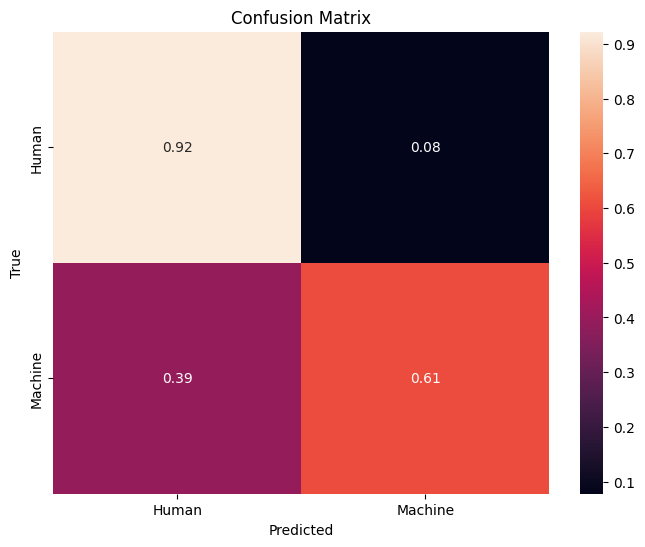

In [33]:
y_pred = xgb_classifier.predict(X)

# Compute confusion matrix
cm = confusion_matrix(y, y_pred)

# Plot confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
sns.heatmap(cmn, annot=True, fmt='.2f', xticklabels=['Human', 'Machine'], yticklabels=['Human', 'Machine'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# M4 paraphrased chatGPT - 20 Features
## lexical = 100, order = 100

In [28]:
import pandas as pd
df = pd.read_csv("/content/drive/MyDrive/features_chatgpt_normalized_paraphrased_100.csv")
df.head()

,source,source_ID,model,prompt,human_text,machine_text,no_sentence_human,no_sentence_machine,num_words_human,num_words_machine,...,check_word2_3_machine,check_word3_machine,check_word4_machine,check_word5_machine,check_num_human,check_num_machine,check_capitals_human,check_capitals_machine,check_et_human,check_et_machine
0,arxiv,704.0007,gpt-3.5-turbo,Generate a 150-220-word abstract for work with...,A rather non-standard quantum representation...,"In this paper, we investigate the continuum li...",0.266667,0.777778,0.173410,0.611111,...,1,1,1,1,0,0,0,0,1,1
1,arxiv,704.0009,gpt-3.5-turbo,Generate a 150-220-word abstract for work with...,We discuss the results from the combined IRA...,"In this paper, we present the results of our a...",0.533333,0.666667,0.895954,0.731481,...,1,1,1,1,1,1,1,1,1,1
2,arxiv,704.0017,gpt-3.5-turbo,Generate a 150-220-word abstract for work with...,Results from spectroscopic observations of t...,"In this work, we present the results of high-r...",0.533333,0.444444,0.635838,0.537037,...,1,1,1,1,1,1,1,1,1,1
3,arxiv,704.0022,gpt-3.5-turbo,Generate a 150-220-word abstract for work with...,We present Lie group integrators for nonline...,"In this work, we present a new method of integ...",0.400000,0.555556,0.491329,0.620370,...,1,1,1,1,0,0,1,1,1,1
4,arxiv,704.0023,gpt-3.5-turbo,Generate a 150-220-word abstract for work with...,"The very nature of the solar chromosphere, i...","In this study, we present the use of Atacama L...",0.200000,0.777778,0.520231,0.680556,...,1,1,1,1,1,0,1,1,1,1


In [29]:
human = ['no_sentence_human', 'num_words_human', 'character0_human', 'character1_human', 'character2_3_human', 'character4_human', 'character5_human', 'std_dev_human', 'sent_len_diff_human', 'count_short_sentences_in_paragraphs_human', 'count_long_sentences_in_paragraphs_human', 'check_word0_human', 'check_word1_human', 'check_word2_3_human', 'check_word3_human', 'check_word4_human', 'check_word5_human', 'check_num_human', 'check_capitals_human', 'check_et_human']
machine = ['no_sentence_machine', 'num_words_machine', 'character0_machine', 'character1_machine', 'character2_3_machine', 'character4_machine', 'character5_machine', 'std_dev_machine', 'sent_len_diff_machine', 'count_short_sentences_in_paragraphs_machine', 'count_long_sentences_in_paragraphs_machine', 'check_word0_machine', 'check_word1_machine', 'check_word2_3_machine', 'check_word3_machine', 'check_word4_machine', 'check_word5_machine', 'check_num_machine', 'check_capitals_machine', 'check_et_machine']

df_human = df.loc[:, human]
df_human['class'] = 0
df_machine = df.loc[:, machine]
df_machine['class'] = 1

human = {'no_sentence_human': 'no_sentence', 'num_words_human': 'num_words', 'character0_human': 'character0', 'character1_human': 'character1', 'character2_3_human': 'character2_3', 'character4_human': 'character4', 'character5_human': 'character5', 'std_dev_human': 'std_dev', 'sent_len_diff_human': 'sent_len_diff', 'count_short_sentences_in_paragraphs_human': 'count_short_sentences_in_paragraphs', 'count_long_sentences_in_paragraphs_human': 'count_long_sentences_in_paragraphs', 'check_word0_human': 'check_word0', 'check_word1_human': 'check_word1', 'check_word2_3_human': 'check_word2_3', 'check_word3_human': 'check_word3', 'check_word4_human': 'check_word4', 'check_word5_human': 'check_word5', 'check_num_human': 'check_num', 'check_capitals_human': 'check_capitals', 'check_et_human': 'check_et'}
machine = {'no_sentence_machine': 'no_sentence', 'num_words_machine': 'num_words', 'character0_machine': 'character0', 'character1_machine': 'character1', 'character2_3_machine': 'character2_3', 'character4_machine': 'character4', 'character5_machine': 'character5', 'std_dev_machine': 'std_dev', 'sent_len_diff_machine': 'sent_len_diff', 'count_short_sentences_in_paragraphs_machine': 'count_short_sentences_in_paragraphs', 'count_long_sentences_in_paragraphs_machine': 'count_long_sentences_in_paragraphs', 'check_word0_machine': 'check_word0', 'check_word1_machine': 'check_word1', 'check_word2_3_machine': 'check_word2_3', 'check_word3_machine': 'check_word3', 'check_word4_machine': 'check_word4', 'check_word5_machine': 'check_word5', 'check_num_machine': 'check_num', 'check_capitals_machine': 'check_capitals', 'check_et_machine': 'check_et'}

df_human = df_human.rename(columns=human)
df_machine = df_machine.rename(columns=machine)

In [30]:
df_human.head()

,no_sentence,num_words,character0,character1,character2_3,character4,character5,std_dev,sent_len_diff,count_short_sentences_in_paragraphs,...,check_word0,check_word1,check_word2_3,check_word3,check_word4,check_word5,check_num,check_capitals,check_et,class
0,0.266667,0.173410,0,1,0,0,0,0.072882,0.071429,1,...,1,1,1,1,1,1,0,0,1,0
1,0.533333,0.895954,0,1,0,0,1,0.046824,0.043651,0,...,1,1,1,1,1,1,1,1,1,0
2,0.533333,0.635838,1,1,0,0,0,0.117109,0.174603,1,...,1,1,1,1,1,1,1,1,1,0
3,0.400000,0.491329,0,1,0,0,0,0.072387,0.083333,0,...,1,1,1,1,1,1,0,1,1,0
4,0.200000,0.520231,1,1,0,0,0,0.097431,0.091270,0,...,1,1,1,1,1,1,1,1,1,0


In [31]:
df_machine.head()

,no_sentence,num_words,character0,character1,character2_3,character4,character5,std_dev,sent_len_diff,count_short_sentences_in_paragraphs,...,check_word0,check_word1,check_word2_3,check_word3,check_word4,check_word5,check_num,check_capitals,check_et,class
0,0.777778,0.611111,0,1,0,0,0,0.204298,0.224490,0,...,1,1,1,1,1,1,0,0,1,1
1,0.666667,0.731481,1,1,0,0,0,0.307471,0.448980,0,...,1,1,1,1,1,1,1,1,1,1
2,0.444444,0.537037,1,1,0,0,0,0.140123,0.061224,0,...,1,1,1,1,1,1,1,1,1,1
3,0.555556,0.620370,0,1,0,0,0,0.188063,0.163265,0,...,1,1,1,1,1,1,0,1,1,1
4,0.777778,0.680556,1,1,0,0,1,0.125974,0.244898,0,...,1,1,1,1,1,1,0,1,1,1


In [32]:
full_df = pd.concat([df_human, df_machine], ignore_index=True)
full_df.head()

,no_sentence,num_words,character0,character1,character2_3,character4,character5,std_dev,sent_len_diff,count_short_sentences_in_paragraphs,...,check_word0,check_word1,check_word2_3,check_word3,check_word4,check_word5,check_num,check_capitals,check_et,class
0,0.266667,0.173410,0,1,0,0,0,0.072882,0.071429,1,...,1,1,1,1,1,1,0,0,1,0
1,0.533333,0.895954,0,1,0,0,1,0.046824,0.043651,0,...,1,1,1,1,1,1,1,1,1,0
2,0.533333,0.635838,1,1,0,0,0,0.117109,0.174603,1,...,1,1,1,1,1,1,1,1,1,0
3,0.400000,0.491329,0,1,0,0,0,0.072387,0.083333,0,...,1,1,1,1,1,1,0,1,1,0
4,0.200000,0.520231,1,1,0,0,0,0.097431,0.091270,0,...,1,1,1,1,1,1,1,1,1,0


# Test on paraphrased chatGPT - 100, 100

In [ ]:
X = full_df.iloc[:,:-1]
y = full_df.iloc[:,-1]

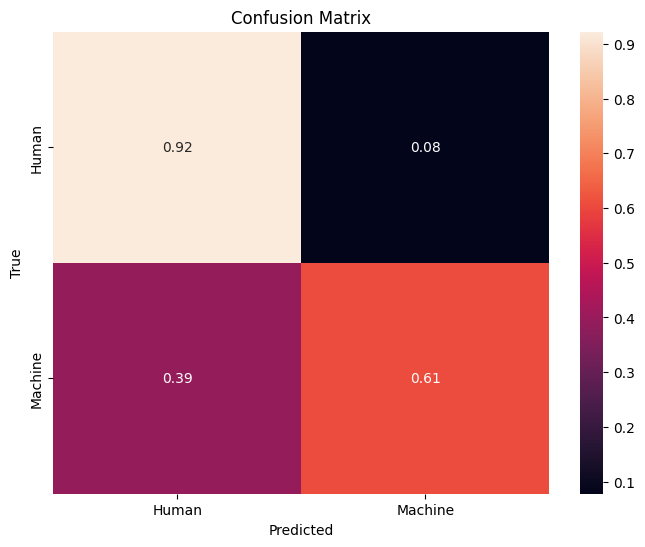

In [34]:
y_pred = xgb_classifier.predict(X)

# Compute confusion matrix
cm = confusion_matrix(y, y_pred)

# Plot confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
sns.heatmap(cmn, annot=True, fmt='.2f', xticklabels=['Human', 'Machine'], yticklabels=['Human', 'Machine'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()